<center>

#    

## 2022./2023.

# EEG Playground

#### Josipa Radak

</center>

# 1. Introduction

<p align="justify">
A Brain–computer interface (BCI) is a means of communication between a human and a computer, based on brain activity. It can be invasive or non-invasive and is specific in that it is independent of the activation of the human's peripheral nerves and muscles. NeuroSky MindWave is one such device that uses electroencephalography (EEG) to measure brain activity. It is a sensor with a single non-invasive dry electrode that is placed at the position
<a href="https://info.tmsi.com/blog/the-10-20-system-for-eeg">FP1</a> (above the left eyebrow). With this sensor, we can retrieve data filtered using high and low-pass filters (1 to 50 Hz), where frequencies are amplified by an amplifier and separated by <a href="https://docs.google.com/presentation/d/1kflVsVrZ5qekad7Y3t1a4fnQam75JHvJ/edit?usp=share_link&ouid=115435477683811347134&rtpof=true&sd=true">fast Fourier transform </a> <a href="https://drive.google.com/file/d/1lmavMPYYjmbSUIv7yupD-VjXudvi-P0R/view?usp=share_link" >(FFT)</a>. NeuroSky MindWave samples at 512Hz (the number of samples per second must be at least 2.5 times the highest frequency). In addition to reading brainwave strength, NeuroSky has developed the eSenseTM algorithm, which measures attention and meditation levels, displayed as values from 0 to 100.

<p align="justify">
This device can be used for various applications, including predicting the desired direction of movement of an object. Such an application can be useful in various fields, such as video games, device control, and medicine.

<p align="justify">
In this project, we will attempt to create a BCI to control the direction of movement of an object (up, down, left, and right).

# 2. Project Description

<p align="justify">
As part of this project, an application has been developed to collect data, create simple machine learning models, and ultimately control the direction of movement of a ball. The application itself is built in React, a JavaScript-based framework. To enable communication between NeuroSky Mindwave and the frontend, a backend was created using the Node.js Express framework, and communication is done using Sockets. Socket was used because data from MindWave is sent every second and this data needs to be retrieved in real-time for display, prediction, etc. Another backend was created in Python <a href="https://flask.palletsprojects.com/en/2.2.x/">Flask</a> (a mini web framework). The Python backend is used for machine learning models (training, prediction).

<p align="justify">
First, data collection comes into play. To begin with, it is necessary to determine what data we are collecting, whether it is endogenous or exogenous interface. In this case, we have an endogenous interface because we do not react to stimuli; rather, we want to determine the direction of movement from some internal processes (thoughts). Here, we must also be careful about the specificity of the EEG signal, i.e., each person's brain works differently and emits different brain signals, so if predictions are good for one person, it does not necessarily mean they will be good for another person. To build a more general system, it is necessary to collect signals from a much larger number of people. In this specific case, the data was collected only from one person. We already know that with the NeuroSky MindWave, we can retrieve values for different brain waves, so we will put each value in a separate column. NeuroSky Mindwave does most of the data processing, but we still need to refine the data a bit. Of course, not all the values we can retrieve will be needed for training the model, so we will select columns, and it will be necessary to scale the data because the data can take on large values (in tens of thousands), which can significantly affect the accuracy of the model.

<p align="justify">
After collecting the data, we can move on to training the models. The chosen algorithms are k-nearest neighbors, support vector machine, and convolutional neural network. These three algorithms are chosen because they are very popular in classification in brain-computer interfaces. The k-nearest neighbors algorithm is one of the simplest supervised learning algorithms that can give good results even on small data sets and has few parameters to adjust for good performance. As it can give good results in binary classification, it can also give good results in multiclass classification. Next comes the support vector machine, which is also a supervised learning algorithm. This is an algorithm that often gives the best results in classification in brain-computer interfaces. Although it is intended for binary classification, it can be used for multiclass classification. The results that SVM gives depend a lot on the parameters that are used, so attention should be paid to that. Also, SVM performs well on smaller data sets, so there is an advantage to using it in this case. Lastly, we have the convolutional neural network. CNN is an artificial neural network that has various applications, most commonly used in image classification. In addition, it is very popular in time series classification. Often, time series data are from different sensors (accelerometer, gyroscope, EKG, EEG). The advantage of CNN over others is that it can automatically extract features. The disadvantage of CNN is that it requires a lot of data for good accuracy, requires adjustment of many parameters that can significantly affect accuracy, and there can be applied different architectures (different number of layers, types of layers) which can also significantly affect accuracy. For these reasons, we will try to make a simple CNN, but it does not necessarily mean it will give good results.

<p align="justify">
Finally, we will look at the accuracy obtained from different models and compare them. After we train the model, we can move on to the fun part, which is prediction, i.e., the game.

<center>
<img src="https://www.mdpi.com/sensors/sensors-21-05746/article_deploy/html/images/sensors-21-05746-g002.png" height="260px"/>
</center>

# 2. Libraries

[***NumPy***](https://numpy.org/doc/stable/index.html) is a Python library that adds support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions for operating on these arrays.

[***Pandas***](https://pandas.pydata.org/) is a Python library for data manipulation and analysis. Specifically, it provides data structures and operations for manipulating numerical tables and time series.

[***SciPy***](https://scipy.org/) is a Python library used for scientific and technical computing. SciPy contains modules for optimization, linear algebra, integration, interpolation, special functions, FFT, signal and image processing, and other tasks common in science and engineering.

[***Matplotlib***](https://matplotlib.org/stable/index.html) is a Python library for plotting and numerical mathematics extension of NumPy.

[***Seaborn***](https://seaborn.pydata.org/#) is a Python library for data visualization based on matplotlib. It provides a high-level interface for creating attractive and informative statistical graphics.

[***Scikit-learn***](https://scikit-learn.org/stable/) is a Python library for machine learning. It contains various algorithms for classification, regression, and clustering.

In [ ]:
!pip install feature_engine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np

#visualisations
import plotly as pt
import matplotlib.pyplot as plt
import seaborn as sns

#data preparation
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split

#algorithms
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

#metrics
from sklearn.metrics import accuracy_score, mean_squared_error, confusion_matrix, ConfusionMatrixDisplay

#choice of the best model
from sklearn.model_selection import GridSearchCV
from feature_engine.encoding import CountFrequencyEncoder

#saving model
from joblib import dump, load

[***TensorFlow***](https://www.tensorflow.org/learn) is a free and open-source software library for machine learning and artificial intelligence. It can be used in a variety of tasks but has a particular focus on training and inference of deep neural networks.

[***Keras***](https://keras.io/about/) is a Python library that allows us to implement neural networks.

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv1D, MaxPooling1D
from tensorflow.keras.optimizers import Adam

In [ ]:
pd.options.mode.chained_assignment = None # remove copy warnings from Pandas

# 3. Data

## 3.1. Loading the data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/strojno/ml_projekt/data1

/content/drive/MyDrive/strojno/ml_projekt/data1


In [ ]:
# laoding the data
df = pd.read_csv('data_eeg.csv')

In [ ]:
# columns in df
print(f"Dataset has {df.shape[0]} rows and {df.shape[1]} columns.")
df.columns

Skup podataka ima 672 redaka i 11 stupaca.


Index(['Attention', 'Meditation', 'Delta', 'Theta', 'LowAlpha', 'HighAlpha',
       'LowBeta', 'HighBeta', 'LowGamma', 'HighGamma', 'Direction'],
      dtype='object')

In [ ]:
# data types
df.dtypes

Attention      int64
Meditation     int64
Delta          int64
Theta          int64
LowAlpha       int64
HighAlpha      int64
LowBeta        int64
HighBeta       int64
LowGamma       int64
HighGamma      int64
Direction     object
dtype: object

In [ ]:
# what the first three rows of data look like
df.head(n=3)

,Attention,Meditation,Delta,Theta,LowAlpha,HighAlpha,LowBeta,HighBeta,LowGamma,HighGamma,Direction
0,0,0,1211551,158308,40565,60230,86218,15418,7542,2469,Up
1,0,0,872492,138722,17569,22709,39100,11003,6746,7458,Up
2,0,0,1123537,13235,2815,34621,3916,2358,1582,1966,Up


## 3.2. Initial data preparation

In [ ]:
# show duplicates
df[df.duplicated(keep=False)]

,Attention,Meditation,Delta,Theta,LowAlpha,HighAlpha,LowBeta,HighBeta,LowGamma,HighGamma,Direction


In [ ]:
# descriptive statistics
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Attention,672.0,53.758929,29.827446,0.0,40.00,57.0,77.00,100.0
Meditation,672.0,50.736607,27.033191,0.0,40.00,56.0,69.00,100.0
Delta,672.0,120909.605655,291278.751363,563.0,10532.50,23842.0,91729.00,2566003.0
Theta,672.0,40855.255952,72519.892910,556.0,11212.00,21415.0,39730.25,1021088.0
LowAlpha,672.0,14141.498512,19050.951537,229.0,4778.75,9328.5,17092.75,305380.0
HighAlpha,672.0,12314.529762,14567.358501,88.0,4512.00,8013.5,14212.00,161140.0
LowBeta,672.0,8877.650298,7714.281282,684.0,4385.25,6975.0,10540.00,86218.0
HighBeta,672.0,9144.026786,6632.100398,438.0,4598.25,7397.0,11618.50,40183.0
LowGamma,672.0,5509.666667,4437.877041,145.0,2534.00,4437.5,7066.00,44680.0
HighGamma,672.0,3039.781250,2389.673778,77.0,1569.75,2448.0,3865.50,28094.0


In [ ]:
# replace categories with numbers and save values
# df.Direction, mapping_index = pd.factorize( df['Direction'] )
df.loc[df.Direction == 'Up', 'Direction'] = 0
df.loc[df.Direction == 'Down', 'Direction'] = 1
df.loc[df.Direction == 'Right', 'Direction'] = 2
df.loc[df.Direction == 'Left', 'Direction'] = 3
df.head(n=3)

,Attention,Meditation,Delta,Theta,LowAlpha,HighAlpha,LowBeta,HighBeta,LowGamma,HighGamma,Direction
0,0,0,1211551,158308,40565,60230,86218,15418,7542,2469,0
1,0,0,872492,138722,17569,22709,39100,11003,6746,7458,0
2,0,0,1123537,13235,2815,34621,3916,2358,1582,1966,0


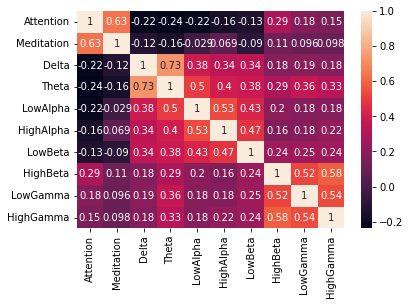

In [ ]:
sns.heatmap(df.corr(), annot = True);

**Select Features**

> What do we have available?

* EEG frequencies

<img src="https://www.researchgate.net/publication/325701712/figure/fig1/AS:636909797773318@1528862537860/Brain-waves-charts-description.png" />

* Attention - level of attention on a scale from 0 to 100 (eSenseTM algorithm)

* Meditation - level of meditation on a scale from 0 to 100 (eSenseTM algorithm)

> Which features will we use and which ones will we not?

We need columns representing wakefulness and mental activity. We will use the columns of Gamma waves, Beta, Alpha and Theta. All of the above indicate an awake - semi-awake state and active mental activity.
We will throw out the columns "Attention", "Meditation" and "Delta" because they do not fit into any of the criteria we set previously or have nothing to do with the criteria.

In [ ]:
# drop the columns we don't need
df.drop(columns = ["Attention", "Meditation", "Delta"], inplace=True)
df.head(n=3)

,Theta,LowAlpha,HighAlpha,LowBeta,HighBeta,LowGamma,HighGamma,Direction
0,158308,40565,60230,86218,15418,7542,2469,0
1,138722,17569,22709,39100,11003,6746,7458,0
2,13235,2815,34621,3916,2358,1582,1966,0


In [ ]:
# drop columns with NaN values
df.dropna(inplace=True)

In [ ]:
df.isna().sum()

Theta        0
LowAlpha     0
HighAlpha    0
LowBeta      0
HighBeta     0
LowGamma     0
HighGamma    0
Direction    0
dtype: int64

Are the categories balanced?

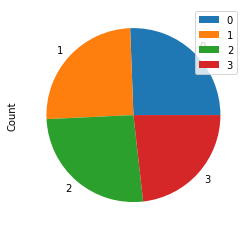

In [ ]:
# up-down-right-left
df_prop=df.groupby("Direction")["Theta"].count().reset_index().rename(columns={"Theta": "Count"})
df_prop.plot(kind="pie", y="Count");

Here we see that our categories are balanced, i.e. we have an almost equal number of records (lines) for each of the categories.

In [ ]:
df.Direction = df.Direction.astype('int')

Now we will split the data into a training set and a test set.

In [ ]:
# split large dataset
X_train, X_test, y_train, y_test = train_test_split(df[['Theta', 'LowAlpha', 'HighAlpha',
       'LowBeta', 'HighBeta', 'LowGamma', 'HighGamma']], df['Direction'], test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((537, 7), (135, 7), (537,), (135,))

## 3.3. Data scaling

MinMax Scaler is one of the most popular scaling algorithms. Transforms features by scaling each feature to a given range, which is generally [0,1] or [-1,-1] in the case of negative values.
At the same time, it scales the values ​​to a certain range of values ​​without changing the shape of the original distribution.

<img src="https://miro.medium.com/v2/resize:fit:394/format:webp/0*Xxr8bx61DBmKn8B0.png" />

This scaler is the most popular scaler when it comes to EEG data.

In [ ]:
# MinMax Scaler
scaler = MinMaxScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 4. Classification

## 4.1. K nearest neighbors (KNN)

**Description:**

The k-nearest neighbors (KNN) algorithm is a data classification method for estimating the probability that a data point will become a member of one group or another based on the group to which the data points closest to it belong.

<img src="https://www.edureka.co/blog/wp-content/uploads/2019/03/How-does-KNN-Algorithm-work-1-KNN-Algorithm-In-R-Edureka-528x250.png" />

**Features:**

* classification

* supervised learning

* lazy algorithm

* satisfactory accuracy even on a small data set

* simple interpretation

**Parameters:**

* n_neighbors - number of neighbors to be taken into account

* weights - weight function used in prediction

  * 'uniform' - all points in the neighborhood weigh the same

  * 'distance' - points that are closer to the point to be classified have more weight (they are more relevant)

* algorithm - the algorithm used to "search" for nearest neighbors

  * 'ball_tree' - splits the space with circles or balls and reduces the search space (binary tree)

  * 'kd_tree' - splits the space into parts with lines (binary tree) and reduces the volume of the search
  <img src="https://i.ytimg.com/vi/fy40y3UFkNE/maxresdefault.jpg" height="300px" />

  * 'brute' - calculates the distance to each point

* metric - the metric used to calculate the distance

    * 'euclidean'
    <img src="https://vitalflux.com/wp-content/uploads/2020/12/Euclidean-Distance-formula-2-300x245.png" height="220px"/>

    * 'manhattan'
    <img src="https://d1m75rqqgidzqn.cloudfront.net/wp-data/2020/07/01130416/june-30-hierarchical-clustering-infograph-for-blog-4.png" height="200px" />

    * 'cosine'
    <img src="https://www.tyrrell4innovation.ca/wp-content/uploads/2021/06/rsz_jenny_du_miword.png" height="300px" />

    * 'haversine'
    <img src="https://images.prismic.io/sketchplanations/e1e45776-aa40-4806-820e-b5c5b8050f4b_SP+687+-+The+haversine+formula.png?auto=compress,format" height="300px" />

* n_jobs - number of cores to be used for key machine learning tasks

Best k:  19  Error:  0.5555555555555556


Text(0.5, 1.0, 'Greška za određeni k')

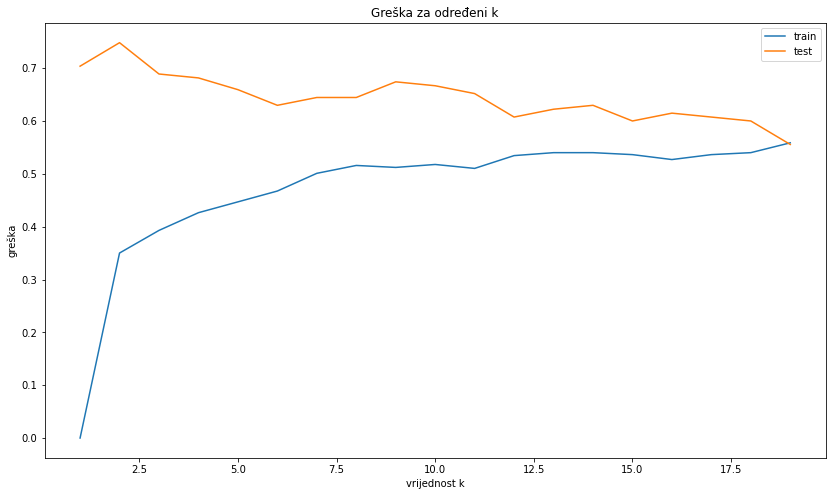

In [ ]:
#data
error1 = []
error2 = []

for k in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=k)

    knn.fit(X_train, y_train)

    y_pred1= knn.predict(X_train)

    error1.append(np.mean(y_train != y_pred1))

    y_pred2= knn.predict(X_test)

    error2.append(np.mean(y_test != y_pred2))

print("Best k: ",error2.index(min(error2))+1, " Error: ", min(error2))
k = error2.index(min(error2))+1
fig, ax = plt.subplots(figsize=(14, 8))
ax.plot(range(1,20), error1, label="train")
ax.plot(range(1,20), error2, label="test")
ax.set_xlabel('k-value')
ax.set_ylabel('error')
ax.legend()
ax.set_title('Error for specific k')

In [ ]:
# initialize the classifier
knn = KNeighborsClassifier(n_neighbors=k)

In [ ]:
print('Parameters:\n')
knn.get_params()

Parametri:



{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 19,
 'p': 2,
 'weights': 'uniform'}

In [ ]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=19)

In [ ]:
# prediction
y_pred = knn.predict(X_test)
print('Accuracy (test): ', accuracy_score(y_pred, y_test))

točnost (test):  0.4444444444444444


In [ ]:
# confusion matrix
confusionMTRX = confusion_matrix(y_test, y_pred)

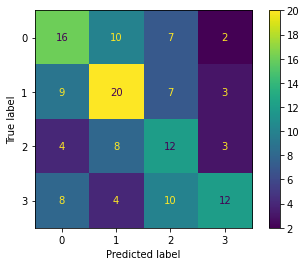

In [ ]:
# confusion matrix display
disp = ConfusionMatrixDisplay(confusion_matrix=confusionMTRX)
disp.plot()
plt.show()

Here we see that knn does not give us a very good accuracy, but it classified the most examples in the class to which it belongs.

In [ ]:
# save the model
dump(knn, 'eeg_knn_01.joblib')

['eeg_knn_01.joblib']

## 4.2. Support Vector Machine (SVM)

**Description:**

Support Vector Machine (SVM) is a supervised machine learning algorithm commonly used for classification, designed primarily for binary classification. It can also be used for multiclass classification. SVM works by attempting to correctly classify as many instances as possible from the training dataset - by adjusting parameters that define the boundary between classes. The boundary between classes in a *linear* SVM is a hyperplane, while in SVM algorithms using other functions, it is a nonlinear surface. Thus, SVM draws a boundary (decision boundary) between the classes it learns to separate. It selects a hyperplane that maximizes the margin (classification strictness), meaning the greatest distance between data points. Data points or vectors closest to the hyperplane and influencing its position are called support vectors because they "support the plane".

<img src="http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1526288453/index3_souoaz.png" height="300px" />

When dealing with multiclass classification, in terms of SVM, we can approach the problem in two ways:

* *One-vs-Rest* approach (OvR) - one class against the rest of the classes, e.g., if we classify fruits (apple, banana, pear) using this approach, the classification would look like this:

  * apple vs. [banana, pear]
  * banana vs. [apple, pear]
  * pear vs. [apple, banana]

  This approach requires each model to predict the probability of belonging to a class or a result similar to probability. The argmax of these results (the index of the class with the highest result) is then used for class prediction. OvR is mainly used when dealing with imbalanced data and small datasets.

<img src="http://windmissing.github.io/images/2019/186.jpg" height="200px" />

* *One-vs-One* approach (OvO) - one class against another class. In this method, each class will be paired one by one with every other class. At the end of the classification training, each classification gets one vote for the winning class. The highest number of votes will determine to which class the test dataset belongs. For example, if we classify fruits (apple, banana, pear) using this approach, the classification would look like this:

  * apple vs. banana
  * apple vs. pear
  * banana vs. pear

<img src="http://windmissing.github.io/images/2019/187.jpg" height="200px" />

**Features:**

* classification
* supervised learning
* eager learning
* robust
* simple interpretation

**Parameters:**

* C - penalty parameter or error, i.e., C adds penalty to each misclassified "point"
  * If the value of C is small, then the penalty for misclassified points is also small, resulting in a larger margin based boundary
  * If the value of C is large, then SVM attempts to minimize the number of misclassified points by reducing the margin width

<img src="https://training.atmosera.com/wp-content/uploads/2021/07/c-margins-1.png" height="300px" />

* kernel - is a function that takes low-dimensional input space and transforms it into a higher-dimensional space, i.e., it converts an inseparable problem into a separable problem. It is mainly useful in problems of nonlinear separation. Simply put, the kernel performs some extremely complex data transformations, then finds a process to separate the data based on defined labels or outputs.

<img src="https://miro.medium.com/max/1400/1*mCwnu5kXot6buL7jeIafqQ.png" height="200px" />

  * 'linear' - used when data is linearly separable, i.e., can be separated using a single line. It is one of the most common kernels used. It is mostly used when there is a large number of features in a specific dataset. One example where there are many features is text classification, as each letter is a new feature. Therefore, we mostly use a linear kernel in text classification.
  * 'poly' - a type of SVM kernel that uses a polynomial function to map data into a higher-dimensional space. It does this by taking the scalar product of data points in the original space and polynomial functions in the new space. It is popular in image processing.
  * 'rbf' - short for "Radial Basis Function Kernel" is a very powerful kernel used in SVM. Unlike linear or polynomial kernels, RBF is more complex and efficient at the same time because it can combine multiple polynomial kernels of different degrees multiple times to project nonlinearly separable data into a higher-dimensional space so that it can be separated using a hyperplane. RBF kernel maps data into a high-dimensional space by finding scalar products and squares of all features in the dataset and then performing classification using the basic idea of linear SVM. It is good to use when we have no prior knowledge about the data.
  * 'sigmoid' - was theoretically proposed for SVM as it originates from neural networks, but has not been widely used in practice so far. As the sigmoid function performs well in neural networks and some other algorithms, it has been suggested to use it here as well. One reason it is rarely used is because it is difficult to adjust the parameters for good results.

<img src="https://miro.medium.com/max/1400/1*qZFPN60NvwbFE_tRg2YPoQ.png" height="300px" />

* degree - is a parameter that we set when our kernel is "poly". It actually represents the degree of the polynomial, and just like with polynomial regression, a high degree of the polynomial can lead to overfitting.

* gamma - is a parameter used with "poly" and "rbf" kernels. The gamma parameter defines how far the influence of one training example reaches, with low values meaning "far" (large radius), resulting in a larger number of clustered points. High values mean "close" (small radius), resulting in a smaller number of clustered points, i.e., points must be very close to each other to be clustered. Lower gamma values result in models with lower accuracy, as well as higher gamma values. Medium gamma values provide a model with good decision boundaries.

<img src="https://i.imgur.com/lURJeuA.png" height="200px" />

In [ ]:
params_grid = [{'kernel': ['linear'], 'C': [0.1, 1, 10, 100]},
               {'kernel': ['rbf'], 'C': [0.1, 1, 10, 100, 150, 200], "gamma": [0.05, 0.1, 0.5, 0.7, 0.9]},
               {'kernel': ['poly'], 'degree': [2,3,5], 'C': [0.1, 1, 10], "gamma": [0.05, 0.1, 0.5]},
               {'kernel': ['sigmoid'], 'C': [0.1, 1, 10, 100, 1000]}
              ]

In [ ]:
svc = svm.SVC()

In [ ]:
svm_model_ovo = GridSearchCV(svc, params_grid, verbose=2, cv=5)
svm_model_ovo.fit(X_train, y_train)

Fitting 5 folds for each of 66 candidates, totalling 330 fits
[CV] END ...............................C=0.1, kernel=linear; total time=   0.0s
[CV] END ...............................C=0.1, kernel=linear; total time=   0.0s
[CV] END ...............................C=0.1, kernel=linear; total time=   0.0s
[CV] END ...............................C=0.1, kernel=linear; total time=   0.0s
[CV] END ...............................C=0.1, kernel=linear; total time=   0.0s
[CV] END .................................C=1, kernel=linear; total time=   0.0s
[CV] END .................................C=1, kernel=linear; total time=   0.0s
[CV] END .................................C=1, kernel=linear; total time=   0.0s
[CV] END .................................C=1, kernel=linear; total time=   0.0s
[CV] END .................................C=1, kernel=linear; total time=   0.0s
[CV] END ................................C=10, kernel=linear; total time=   0.0s
[CV] END ................................C=10, 

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [0.1, 1, 10, 100], 'kernel': ['linear']},
                         {'C': [0.1, 1, 10, 100, 150, 200],
                          'gamma': [0.05, 0.1, 0.5, 0.7, 0.9],
                          'kernel': ['rbf']},
                         {'C': [0.1, 1, 10], 'degree': [2, 3, 5],
                          'gamma': [0.05, 0.1, 0.5], 'kernel': ['poly']},
                         {'C': [0.1, 1, 10, 100, 1000], 'kernel': ['sigmoid']}],
             verbose=2)

In [ ]:
print('Best score for training data:', svm_model_ovo.best_score_,"\n")
print('Best Estimator:',svm_model_ovo.best_estimator_,"\n")
print('Best C:',svm_model_ovo.best_estimator_.C,"\n")
print('Best Kernel:',svm_model_ovo.best_estimator_.kernel,"\n")
if svm_model_ovo.best_estimator_.kernel == "poly":
  print('Best degree:', svm_model_ovo.best_estimator_.degree)
  print('Best gamma:', svm_model_ovo.best_estimator_.gamma)
if svm_model_ovo.best_estimator_.kernel == "rbf":
  print('Best gamma:', svm_model_ovo.best_estimator_.gamma)

Best score for training data: 0.38367947386638973 

Best Estimator: SVC(C=150, gamma=0.7) 

Best C: 150 

Best Kernel: rbf 

Best gamma: 0.7


In [ ]:
if svm_model_ovo.best_estimator_.kernel == "poly":
  svml = svm.SVC( kernel = "poly",
                 C = svm_model_ovo.best_estimator_.C,
                 degree = svm_model_ovo.best_estimator_.degree,
                 gamma = svm_model_ovo.best_estimator_.gamma)
  svml.fit(X_train, y_train)
elif svm_model_ovo.best_estimator_.kernel == "rbf":
  svml = svm.SVC(kernel = "rbf",
                 C = svm_model_ovo.best_estimator_.C,
                 gamma = svm_model_ovo.best_estimator_.gamma)
  svml.fit(X_train, y_train)
else:
  svml = svm.SVC(kernel = svm_model_ovo.best_estimator_.kernel,
                 C = svm_model_ovo.best_estimator_.C)
  svml.fit(X_train, y_train)

In [ ]:
y_pred = svml.predict(X_test)
print('Accuracy (test): ', accuracy_score(y_pred, y_test))

točnost (test):  0.4


In [ ]:
print("Training set score for SVM: %f" % svml.score(X_train , y_train))
print("Testing  set score for SVM: %f" % svml.score(X_test, y_test))

Training set score for SVM: 0.467412
Testing  set score for SVM: 0.400000


In [ ]:
confusionMTRX_SVM = confusion_matrix(y_test, y_pred)

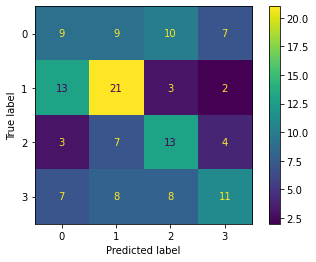

In [ ]:
disp_SVM = ConfusionMatrixDisplay(confusion_matrix=confusionMTRX_SVM)
disp_SVM.plot()
plt.show()

In [ ]:
# save the model
# dump(svml, 'eeg_svml.joblib')

SVM does not give good results like knn. We see that the worst forecast is class 0, i.e. "UP".

## 4.3. Convolutional Neural Network

**Description:**

A neural network is an architecture in artificial intelligence that teaches computers to process data in a way inspired by the human brain. It's a type of machine learning process called deep learning, which uses interconnected nodes or neurons in a layered structure resembling the human brain. The basic building unit is the neuron. They consist of input layers, hidden layers, and an output layer. One of the architectures of neural networks is the Convolutional Neural Network (CNN), which is primarily used for classification, most commonly in the field of computer vision (images). These networks are easily recognizable because they have 2 layers in the architecture specific to convolutional neural networks, namely the convolutional layer and the pooling layer.

* Convolutional layers - this is the most important layer of convolutional neural networks (most computation)

  <img src="https://i.stack.imgur.com/WNIXd.png" height="160px" />

    * the input is passed through a filter, resulting in a feature map / activation map

    * the weights (values) of the filters are learned during training

    * neurons are only connected to part of the input

    * Neurons share weights, reducing the number of parameters learned

    * Different filters detect different features

* Pooling layer - reduces the height and width of the input and implements invariance to small translations of the input

    * max pooling - finds the maximum

  <img src="https://www.researchgate.net/publication/324177888/figure/fig4/AS:611641670524928@1522838146208/1D-max-pooling-operation.png" height="160px" />

    * min pooling - finds the minimum

    * average pooling - finds the average

  <img src="https://ars.els-cdn.com/content/image/3-s2.0-B9780128222263000118-f11-07-9780128222263.jpg" height="300px"/>

* Fully connected layer - usually at the end of the network, must have the number of outputs equal to the number of classes we are predicting

<img src="https://www.mdpi.com/sensors/sensors-22-08343/article_deploy/html/images/sensors-22-08343-g001.png" height="200px"/>


Convolutional neural networks can also be applied to one-dimensional sequences of data. CNNs are commonly used in time series classification because they can learn from raw data, i.e., they do not require manual feature engineering.

**Features:**

* classification

* supervised learning

* require larger datasets

* parameters and architecture can significantly affect results

* harder interpretation (black box)

**Parameters:**

* Conv1D - convolutional layer

    * filters - number of sliding windows

    * kernel_size - size of the sliding window

    * activation - activation function
    
<img src="https://studymachinelearning.com/wp-content/uploads/2019/10/summary_activation_fn.png" height="200px" />

    
  * input_shape - shape of the data

* MaxPooling1D - pooling layer

    * pool_size - size of the pooling window

* Flatten - flattening

* Dense

    * activation - activation function

Compile:

* loss - function that compares target and predicted output values; measures how well the neural network models the data during training

* optimizer - algorithm or method used to minimize the loss function or increase production efficiency. Optimizers are mathematical functions that depend on model parameters that can be learned, i.e., weights and biases. Optimizers help determine how to change the weights and learning rate of the neural network to reduce losses. The most popular ones are:

* metrics - function used to evaluate model performance. They are similar to loss functions, except that the results of metric evaluation are not used in model training.

Fitting:

* batch_size - number of examples used in one iteration of training

* epochs - one complete pass through the training dataset through the algorithm


<img src="https://cdn-images-1.medium.com/fit/t/1600/480/1*5A4b1qOZIr4Q6SKceqGn7w.jpeg" height="200px" />


In [ ]:
# transform
x_train_cnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
x_test_cnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
print(X_train.shape, X_test.shape)

(537, 7) (135, 7)


In [ ]:
y_train_cnn = y_train.to_numpy()
y_test_cnn = y_test.to_numpy()
print(y_train_cnn.shape, y_test_cnn.shape)

(537,) (135,)


In [ ]:
model = Sequential()
# model.add(Conv1D(64, kernel_size = (3), activation='relu', input_shape=(7, 1)))
# model.add(Conv1D(32, kernel_size = (3), activation='relu'))
# model.add(MaxPooling1D(pool_size=(2)))
# model.add(Flatten())
# model.add(Dense(4, activation='softmax'))

model.add(Conv1D(64, kernel_size = (5), activation='relu', padding='same', input_shape=(7, 1)))
model.add(Conv1D(128, kernel_size = (5), activation='relu', padding='same'))
model.add(Conv1D(256, kernel_size = (5), activation='relu', padding='same'))
model.add(Conv1D(512, kernel_size = (5), activation='relu', padding='same'))
model.add(Conv1D(64, kernel_size = (2), activation='relu', padding='same'))
model.add(Flatten())
model.add(Dense(4, activation='softmax'))
model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = "adam",
              metrics = ['accuracy'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_35 (Conv1D)          (None, 7, 64)             384       
                                                                 
 conv1d_36 (Conv1D)          (None, 7, 128)            41088     
                                                                 
 conv1d_37 (Conv1D)          (None, 7, 256)            164096    
                                                                 
 conv1d_38 (Conv1D)          (None, 7, 512)            655872    
                                                                 
 conv1d_39 (Conv1D)          (None, 7, 64)             65600     
                                                                 
 flatten_7 (Flatten)         (None, 448)               0         
                                                                 
 dense_7 (Dense)             (None, 4)                

In [ ]:
# @title
epo=30
cnn_history = model.fit(x_train_cnn, y_train_cnn, batch_size=32, epochs=epo, verbose=2, validation_data = (x_test_cnn, y_test_cnn))

Epoch 1/30
17/17 - 5s - loss: 1.3821 - accuracy: 0.2626 - val_loss: 1.3699 - val_accuracy: 0.3630 - 5s/epoch - 279ms/step
Epoch 2/30
17/17 - 2s - loss: 1.3581 - accuracy: 0.2588 - val_loss: 1.3515 - val_accuracy: 0.2963 - 2s/epoch - 117ms/step
Epoch 3/30
17/17 - 2s - loss: 1.3249 - accuracy: 0.3128 - val_loss: 1.3355 - val_accuracy: 0.3037 - 2s/epoch - 119ms/step
Epoch 4/30
17/17 - 2s - loss: 1.3094 - accuracy: 0.3538 - val_loss: 1.3268 - val_accuracy: 0.3185 - 2s/epoch - 117ms/step
Epoch 5/30
17/17 - 2s - loss: 1.3084 - accuracy: 0.3464 - val_loss: 1.2950 - val_accuracy: 0.3630 - 2s/epoch - 118ms/step
Epoch 6/30
17/17 - 3s - loss: 1.2830 - accuracy: 0.3594 - val_loss: 1.2991 - val_accuracy: 0.3333 - 3s/epoch - 159ms/step
Epoch 7/30
17/17 - 3s - loss: 1.2530 - accuracy: 0.4134 - val_loss: 1.2881 - val_accuracy: 0.3852 - 3s/epoch - 155ms/step
Epoch 8/30
17/17 - 2s - loss: 1.2499 - accuracy: 0.3985 - val_loss: 1.3025 - val_accuracy: 0.3926 - 2s/epoch - 143ms/step
Epoch 9/30
17/17 - 3s - 

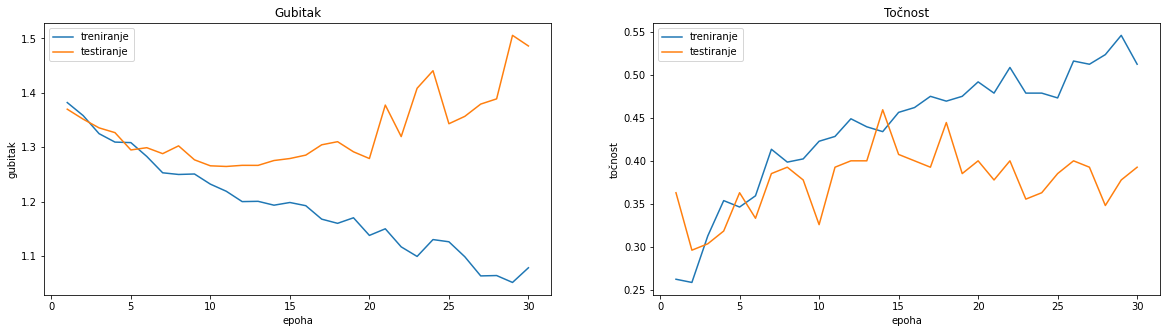

In [ ]:
plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
plt.title("Loss")
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.plot(range(1,epo+1), cnn_history.history['loss'], label = 'train')
plt.plot(range(1,epo+1), cnn_history.history['val_loss'], label = 'test')
plt.legend()

plt.subplot(1, 2, 2)
plt.title("Accuracy")
plt.xlabel("epoch")
plt.ylabel("Accuracy")
plt.plot(range(1,epo+1), cnn_history.history['accuracy'], label = 'train')
plt.plot(range(1,epo+1), cnn_history.history['val_accuracy'], label = 'test')
plt.legend()

In [ ]:
pred = model.predict(x_test_cnn)
pred_y = pred.argmax(axis=-1)

5/5 [==============================] - 0s 9ms/step


In [ ]:
confusionMTRX_CNN = confusion_matrix(y_test_cnn, pred_y)

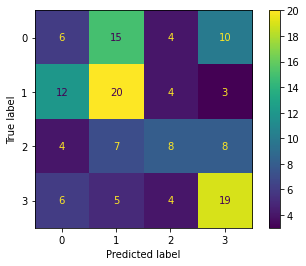

In [ ]:
disp_CNN = ConfusionMatrixDisplay(confusion_matrix=confusionMTRX_CNN)
disp_CNN.plot()
plt.show()

In [ ]:
# save the model
# model.save('eeg_cnn.h5')

CNN performs slightly better than SVM but worse than KNN. Two architectures were tested for prediction, but the one unchecked yields better results. Overfitting can also be observed here. This can be seen from the graph, namely, the accuracy on the training set increases while it decreases on the test set. In this case, CNN is not the best solution because we have a small dataset, which is also reflected in the results provided by the model.

# 5. Conclusion

<p align="justify">
In this project, we attempted to classify the direction of movement of an object using EEG data. However, in the end, we did not achieve the best results with any of the 3 machine learning algorithms. Among them, the K-nearest neighbors algorithm performed the best, while the convolutional neural network performed the worst. The accuracy of the K-nearest neighbors algorithm for 4 classes is not so bad, considering the number of classes we are predicting. There could be many reasons for the unsuccessful classification. The most likely one lies in the data itself. EEG recordings are specific to each individual, and we cannot know how good our data is at first glance. We must consider that this is an endogenous BCI, and it can be very difficult for the participant to imagine the direction. Direction is specific in that it can be a quite abstract concept for the participant to imagine. In the end, we can say that we are not quite satisfied with the obtained results.
</p>
